In [13]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
tips_all = sns.load_dataset("tips")
tips_grouped = tips_all.groupby(["smoker", "size"])
tips = tips_grouped.mean()
tips["error_min"] = tips_grouped.total_bill.apply(stats.sem) * 1.96
tips["error_max"] = tips_grouped.total_bill.apply(stats.sem) * 1.96
tips.reset_index(inplace=True)
tips

,smoker,size,total_bill,tip,error_min,error_max
0,Yes,1,5.825000,1.460000,5.399800,5.399800
1,Yes,2,17.955758,2.709545,1.805528,1.805528
2,Yes,3,28.191667,4.095000,6.898186,6.898186
3,Yes,4,30.609091,3.992727,5.150063,5.150063
4,Yes,5,29.305000,2.500000,2.263800,2.263800
5,Yes,6,NaN,NaN,NaN,NaN
6,No,1,8.660000,1.415000,2.763600,2.763600
7,No,2,15.342333,2.489000,0.919042,0.919042
8,No,3,21.009615,3.069231,2.680447,2.680447
9,No,4,27.769231,4.195769,3.303131,3.303131


In [14]:
def my_errorbar(*args, **kwargs):
    data = kwargs['data']
    errors = np.vstack([data['error_min'], 
                        data['error_max']])
    print(errors)
    plt.errorbar(data[args[0]], 
                 data[args[1]], 
                 yerr=errors,
                 **kwargs);  

In [15]:
def my_errorbar(*args, **kwargs):
    data = kwargs.pop('data')
    errors = np.vstack([data['error_min'], 
                        data['error_max']])

    print(errors)

    plt.errorbar(data[args[0]], 
                 data[args[1]], 
                 yerr=errors,
                 **kwargs);    

In [16]:
g = sns.FacetGrid(tips, col="smoker", size=5)
g.map_dataframe(my_errorbar, "size", "total_bill", marker="o")

[[ 5.3998      1.80552788  6.89818577  5.1500631   2.2638    ]
 [ 5.3998      1.80552788  6.89818577  5.1500631   2.2638    ]]
[[  2.7636       0.9190424    2.68044722   3.30313068  11.62080751
    9.19436049]
 [  2.7636       0.9190424    2.68044722   3.30313068  11.62080751
    9.19436049]]


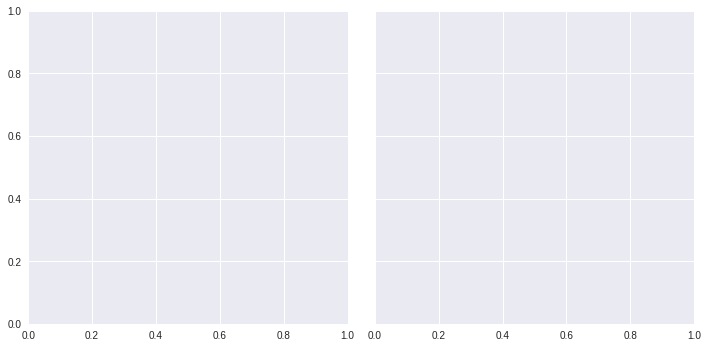

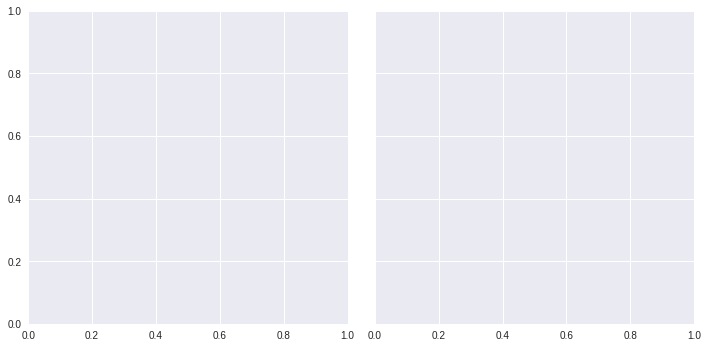

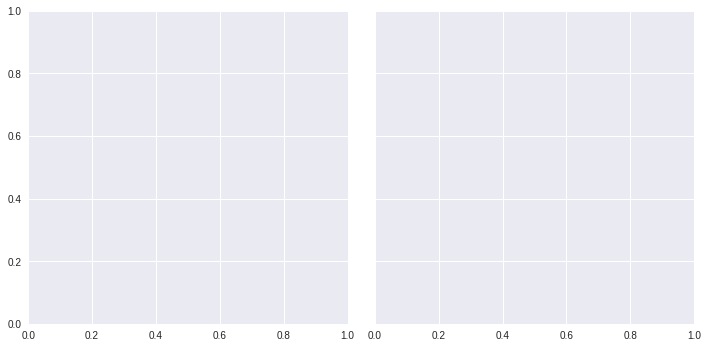

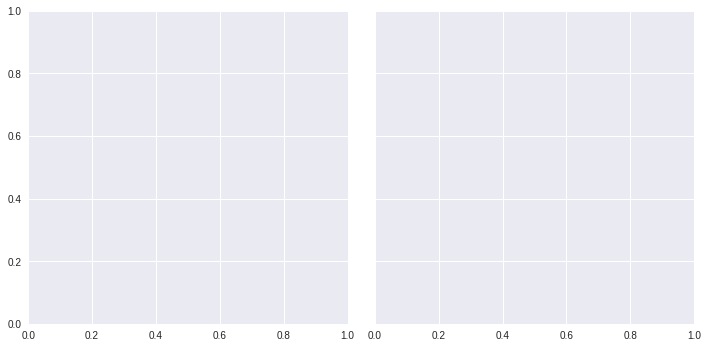

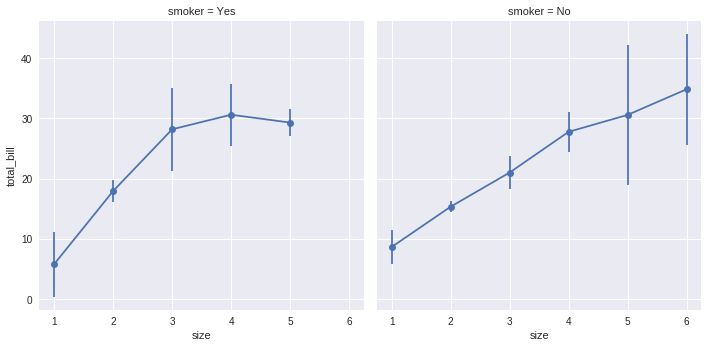

In [17]:
plt.show()

In [20]:
import numpy as np
import pandas
import seaborn as sns

x, y = np.meshgrid(np.linspace(0, 100), np.linspace(0, 100))

df = pandas.DataFrame(dict(
       x=r_[x.ravel(), x.ravel()],
       y=r_[y.ravel(), y.ravel()],
       s=r_[
           np.ones_like(x.ravel()),
           np.ones_like(x.ravel()) * 10
       ]
))

df['value'] = (
   df.x *
   exp(-((df.x - df.y) ** 2 / df.s ** 2))
)

g = sns.FacetGrid(df, col='s')

def data_frame_to_matrix(fn):
   def dummy(*args, **kwargs):
       data_ = kwargs['data']
       kwargs_ = kwargs.copy()
       del kwargs_['data']
       del kwargs_['color']
       data_ = data_.pivot(args[1], args[0])[args[2]]
       X, Y = meshgrid(data_.columns, data_.index)
       return fn(X, Y, data_, *args[3:], **kwargs_)
   return dummy

g.map_dataframe(
   data_frame_to_matrix(contourf),
   'x', 'y', 'value', 5)

NameError: name 'r_' is not defined